# Applying Correlation Coefficients - Educational Attainment and Unemployement 

---



This notebook focuses on state and regional unemployment data for various education levels to
create scatter plots and calculate correlation coefficients. 

---


### Topics Covered
- Educational attainment
- Correlation coefficients
- Influential points
- Scatter plots

### Table of Contents

[Overwiew](#overwiew)<br>


1 - [Why the Census](#1)<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.1 - [How is the data used?](#s1.1)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.2 - [Census and Congresional Represenation](#s1.2)

2 - [Vocabulary](#2)<br>

3 - [Part 1 - Consider the Data](#3)<br>

4 - [Part 2 - Analyze the Data](#4)<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 4.1 - [Strength of Association](#s4.1)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 4.2 - [Correlation Coefficients](#s4.2)

5 - [Part 3 - Create Your Own Scatter Plots](#5)<br>

6 - [Part 4 - Draw Conclusions and Review Key Concepts](#6)<br>

7 - [Bibliography](#7)<br>

---

## Overview <a id='overwiew'></a>

In Part 1 of this lesson, you will analyze data about the educational attainment and unemployment in the United States. Later in Part 2, you will compare unemployment rates among people of different education levels and learn how to calculate correlation coefficients. Finally, in Part 3 you will create your own scatter plots to find correlation coefficients for your own data!

---

In [16]:
#Press 'Shift' + 'Enter' to run this code! It will help load graphs & charts that this lesson has!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

import sys
sys.path.append("../")
from censusnotebooks import widgets, visualization

**Tip**: When you're done reading each part of this lesson, press the **'Shift' + 'Enter' keys at the same time** to quickly move through each 'cell' and run the code! 

---

# 1. Why the Census? <a id='1'></a>

<div class="alert alert-info">
<b> Question:</b>
<!--But before we dive in, let's answer a question you might have:--> Why are we learning about statistics through Census data? In fact, why do we even care about the Census in the first place?
</div>

Depending on how old you are, you might or might not have watched your family or guardian fill out a long form about a decade ago that had some specific, slightly invasive questions like: 
1. How many people live or stay in this house, apartment, or mobile home?
2. What is the name of the person who owns this house, apartment, or mobile home?
3. How old is the person who owns this house, apartment, or mobile home? When is his or her birthday?

## 1.1 How is the Data Used?<a id='s1.1'></a>

The census form is a way for the government to get a good idea as to **who** it is serving, which is: **YOU!** The government uses data it gets from this nation-wide Census to determine funding distributions across U.S. communities, as well as understand where community services are needed and how to implement them. Because of the Census, your neighborhood and city can improve education and transportation, promote public health, and use given money to make improvements. More services can be given to the elderly, new roads and schools can be built, and more job training centers can be maintained and established. *Everyone* benefits.

## 1.2 Census and Congresional Represenation <a id='s1.2'></a>

The amount of representation that your state has changes within Congress (in the U.S. House of Representatives) every ten years, when the Census is distributed. The voices of those vouching for your state's well-being in Congress could change or stay the same. Additionally, the representative (or "voice") representing your community in local, state, and federal governments could change, because district lines are redrawn every time. Members of Congress, state legislators, and many county and municipal offices are elected by voters grouped into districts, and you could be voting for different people depending on how these lines are drawn. These representatives are your spokespeople - their job is to listen to your needs and support government policies that will help your community!  


For more information, check out this document [here](https://www2.census.gov/programs-surveys/sis/resources/census101.pdf), designed to inform students like you on why the Census is so important! And for more reading on the confusing topic of re-districting, read [here](https://www.brennancenter.org/analysis/7-things-know-about-redistricting). 

---

# 2. Vocabulary<a id='2'></a>

Here are some terms that you will need to understand before moving on with the lesson. 

* **Correlation coefficient (r)** – a measure of the strength of a linear relationship between two variables,
whose absolute value indicates a stronger association when closer to 1 and a weaker association when
closer to 0; the negative or positive sign of the coefficient indicates the direction of the relationship
* **Slope** – the rate of change in a linear model, or the amount by which a y value increases (for positive
slopes) or decreases (for negative slopes) for every unit increase in an x value
* **Line of best fit** – a straight line drawn through the center of a group of data points on a scatter plot,
showing how closely the two variables on the scatter plot are associated
* **Influential point** – a data point that significantly affects both the slope of the line of best fit and the
correlation coefficient
* **Scatter plot** – a graph in the coordinate plane that displays a set of bivariate data and can be used to
determine how two variables are associated (e.g., to show associations between the heights and weights
of a group of people)
* **Strength of association** – a measure of how tightly points are clustered


# 3. Part 1 - Consider the Data <a id='3'></a>

Let's look at some data from the American Community Survey. The American Community Survey (ACS) is conducted monthly by the U.S. Census Bureau and is designed to show how communities change. Through asking questions to a sample of the population, it produces national data on more than 35 categories of information, such as education, income, housing, and employment.

The following data is from the 2014 American Community Survey about the educational attainment and
unemployment in the United States. You can see the entire data table [here](https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?src=bkmk), but we've done the work to extract the overall unemployment rate for each state and the unemployment rates for a specific education level.



Run the code below to see the **unemployment** data table by pressing **'Shift' + 'Enter'**

In [17]:
data = {'State':['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana','Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi','Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina','North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee','Texas', 'Utah', 'Vermont', 'Virginia', 'Washington','West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'], "Overall(%)": ['6.9', '6.7', '6.7', '5.7', '7.1', '4.3', '6.6', '5.8', '7.7',
       '6.9', '6.6', '4.4', '4.5', '6.7', '5.7', '3.4', '4.2', '6.3', '6.0', '5.0', '6.0', '5.8', '6.8', '3.8', '7.7', '5.7', '4.0','3.2', '7.7', '4.3', '6.4', '7.3', '6.0', '6.7', '2.4', '5.8', '4.5', '6.7', '5.7', '6.6', '6.5', '3.0', '6.3', '4.8', '3.9', '4.7', '4.8', '5.1', '5.8', '4.5', '3.9', '15.2'], "Less Than High School Graduate (%)":['13.7', '14.0', '10.7', '10.6', '10.1', '7.5', '13.9', '9.5','14.6', '12.1', '12.1', '9.0', '8.9', '12.4', '11.9', '9.5', '8.3','13.7', '12.4', '11.1', '12.7', '11.9', '16.8', '9.4', '17.3',
       '14.3', '10.0', '8.4', '9.8', '8.3', '10.4', '13.6', '10.2', '13.2', '7.8', '15.5', '9.2', '13.7', '13.1', '12.5', '16.2','8.6', '14.3', '6.5', '5.7', '12.0', '9.3', '9.0', '13.1', '10.5','12.8', '30.3'], "High School Graduate or Equivalent (%)":['8.9', '12.0', '9.0', '7.6', '9.3', '5.4', '9.0', '8.4', '17.6', '8.7', '8.4', '6.0', '5.6', '9.1', '7.4', '4.8', '5.9', '7.9', '6.6', '7.0', '8.1', '8.6', '9.1', '5.6', '9.3', '7.5', '5.8', '4.5', '9.4', '6.2', '8.6', '9.1', '7.8', '9.1', '3.2', '7.0','5.5', '8.5', '7.0', '9.7', '8.3', '3.8', '8.0', '6.2', '6.1',
       '7.2', '6.2', '6.3', '7.0', '5.5', '4.5', '20.3'],  "Some College Eduation or Associate's Degree (%)":  ['6.6', '5.8', '6.7', '5.2', '7.5', '4.7', '7.1', '6.2', '14.6', '6.5', '7.1', '4.7', '4.4', '7.3', '5.5', '3.2', '4.3', '5.8','5.8', '5.2', '6.6', '6.6', '6.7', '3.6', '7.1', '5.6', '4.1','2.8', '7.4', '4.5', '7.0', '7.4', '6.4', '6.5', '2.2', '5.9',
       '4.4', '6.6', '6.0', '6.5', '5.9', '2.9', '5.5', '4.9', '3.9', '4.9', '5.3', '5.3', '5.9', '4.6', '3.3', '14.3'], "Bachelor's Degree or Higher (%)": ['3.1', '2.0', '3.6', '2.2', '4.4', '2.9', '3.8', '2.6', '3.1','4.3', '3.4', '2.2', '2.4', '3.5', '2.5', '1.4', '2.1', '3.1', '3.2', '2.3', '3.4', '3.3', '3.4', '2.2', '3.1', '2.8', '1.6', '1.8', '4.9', '2.5', '4.1', '3.1', '3.7', '3.4', '1.4', '2.6',
       '2.0', '4.0', '3.1', '3.0', '2.7', '1.6', '3.2', '3.0', '2.0','1.9', '3.1', '3.5', '2.3', '2.4', '2.4', '8.0'] } 
unemployment = pd.DataFrame(data)
unemployment.head(10)

,State,Overall(%),Less Than High School Graduate (%),High School Graduate or Equivalent (%),Some College Eduation or Associate's Degree (%),Bachelor's Degree or Higher (%)
0,Alabama,6.9,13.7,8.9,6.6,3.1
1,Alaska,6.7,14.0,12.0,5.8,2.0
2,Arizona,6.7,10.7,9.0,6.7,3.6
3,Arkansas,5.7,10.6,7.6,5.2,2.2
4,California,7.1,10.1,9.3,7.5,4.4
5,Colorado,4.3,7.5,5.4,4.7,2.9
6,Connecticut,6.6,13.9,9.0,7.1,3.8
7,Delaware,5.8,9.5,8.4,6.2,2.6
8,District of Columbia,7.7,14.6,17.6,14.6,3.1
9,Florida,6.9,12.1,8.7,6.5,4.3


<div class="alert alert-info">  
    <strong>3.1</strong> What is one thing you notice? Which data values catch your attention?
</div>


**Your answer:** Type your answer here

<div class="alert alert-info">  
    <strong>3.2</strong> Write one question about the data that you could investigate?
</div>

**Your answer:** Type your answer here



---
**Congratulations!** You just finished Part 1 of this lesson! Make sure to click 'File', then 'Save and Checkpoint' in the upper left-hand corner to save all the hard work you've done!


# 4. Part 2 - Analyze the Data <a id='4'></a>


## 4.1 Strength of Association <a id='s4.1'></a> 

In Part 2, you will analyze the **unemployment** data table. First, let's look at the following graphs that compare unemployment rates among people of different education levels with their overall
unemployment rate in 2014. 

Make sure that you are paying close attention to the **strength of association** between the scatter plots. *Tip:* If you forget what this is revisit the vocabulary section!

Text(0, 0.5, 'Less Than High School Graduate (%)')

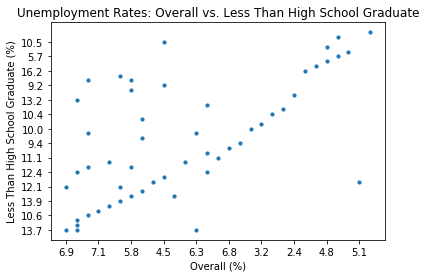

In [18]:
#Run this code to see a graph by pressing 'Shift' + 'Enter'

plt.scatter(unemployment["Overall(%)"],
            unemployment["Less Than High School Graduate (%)"],s=10)

plt.xticks(np.arange(0, 30, step=3))
plt.yticks(np.arange(0, 40, step=3))
plt.title("Unemployment Rates: Overall vs. Less Than High School Graduate")
plt.xlabel("Overall (%)")
plt.ylabel("Less Than High School Graduate (%)")

Text(0, 0.5, 'High School Graduate or Equivalent (%)')

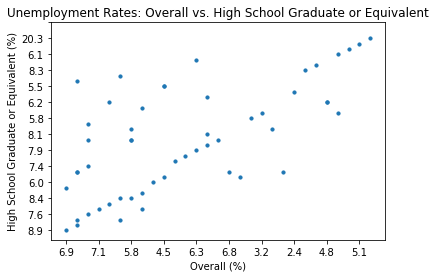

In [19]:
#Run this code to see a graph by pressing 'Shift' + 'Enter'

plt.scatter(unemployment["Overall(%)"],
            unemployment["High School Graduate or Equivalent (%)"],s=10)

plt.xticks(np.arange(0, 30, step=3))
plt.yticks(np.arange(0, 40, step=3))
plt.title("Unemployment Rates: Overall vs. High School Graduate or Equivalent")
plt.xlabel("Overall (%)")
plt.ylabel("High School Graduate or Equivalent (%)")



Text(0, 0.5, "Some College Eduation or Associate's Degree")

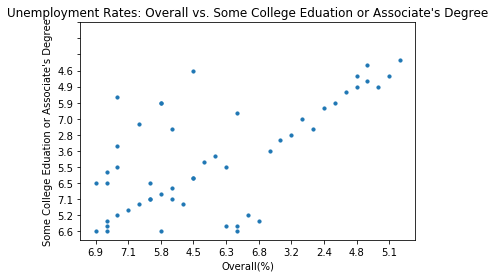

In [20]:
#Run this code to see a graph by pressing 'Shift' + 'Enter'

plt.scatter((unemployment["Overall(%)"]),
            unemployment["Some College Eduation or Associate's Degree (%)"],s=10)

plt.xticks(np.arange(0,30, step=3))
plt.yticks(np.arange(0,40, step=3))
plt.title("Unemployment Rates: Overall vs. Some College Eduation or Associate's Degree")
plt.xlabel("Overall(%)")
plt.ylabel("Some College Eduation or Associate's Degree")

Text(0, 0.5, "Some College Eduation or Associate's Degree")

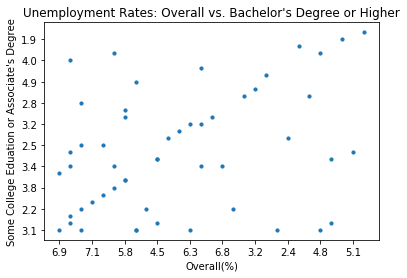

In [21]:
#Run this code to see a graph by pressing 'Shift' + 'Enter'

plt.scatter((unemployment["Overall(%)"]),
            unemployment["Bachelor's Degree or Higher (%)"],s=10)

plt.xticks(np.arange(0, 30, step=3))
plt.yticks(np.arange(0, 30, step=3))
plt.title("Unemployment Rates: Overall vs. Bachelor's Degree or Higher")
plt.xlabel("Overall(%)")
plt.ylabel("Some College Eduation or Associate's Degree")

<div class="alert alert-info">  
    <strong>4.1.1</strong> Which two education levels’ unemployment rates appear to be most strongly associated with the
overall unemployment rates in a division? Explain.
</div>

**Your answer:** Type your answer here

<div class="alert alert-info">  
    <strong>4.1.2</strong> Which education level’s unemployment rates appear to be least strongly associated with the overall
unemployment rates in a division? Explain.
</div>

**Your answer:** Type your answer here

<div class="alert alert-info">  
    <strong>4.1.3</strong> The correlation coefficient is a measure of the strength of the linear relationship between two variables. The closer the correlation coefficient is to 0, the weaker the linear relationship. With this in mind, match each of the following correlation coefficients with the correct scatter plot from earlier. (<em>Note:</em> Your answers for the highest two coefficients can be interchangeable.)
</div>


* 0.54: 
* 0.81:
* 0.94: 
* 0.95: 

---

## 4.2 Correlation Coefficients <a id='s4.2'></a> 


Correlation coefficients are represented by $r$, which are calculated using this formula:

$$ r = \frac{\sum_{i=1}^n[(x_i - \bar{x})(y_i - \bar{y})]}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2}\sqrt{\sum_{i=1}^n (y_i - \bar{y})^2}}$$

Here $n$ represents the number of data pairs, $x_i$ and $y_i$ are the specific data points, $\bar{x}$ and $\bar{y}$ are the means of the $x$ and $y$ values. $\sum_{i=1}^n$ finds the sum of everything for the first pair $(i = 1)$ through the last $(i = n)$. We will be using this formula to find the correlation coefficients for the data below. 


We will use the **regions** data table below — on unemployment rates overall and for people with some college education or an associate’s degree in the four main regions (Northeast, Midwest, South, and West) identified by the Census Bureau — to complete the calculations table that follows.

In [22]:
#Run this code by pressing 'Shift' + 'Enter'

data= {'Region': ["Northeast", "Midwest", "South", "West"], 
       'Overall (%)': [5.9, 5.5, 6.0, 6.4], 
      "Some College Education or Associate's Degree (%)":  [6.4, 5.5, 5.9, 6.5]}

regions = pd.DataFrame(data)
regions

,Region,Overall (%),Some College Education or Associate's Degree (%)
0,Northeast,5.9,6.4
1,Midwest,5.5,5.5
2,South,6.0,5.9
3,West,6.4,6.5


<div class="alert alert-info">  
    <strong>4.2.1</strong> We find the mean of the x values represented by $\bar{x}$. <em>Note:</em> the x values are the 'Overall (%)' column in the <strong>regions</strong> table.
    </div>

In [23]:
#Run this code to see a table by pressing 'Shift' + 'Enter'

x_bar = regions['Overall (%)'].mean()
x_bar

5.949999999999999

<div class="alert alert-info"> 
    <strong>4.2.2</strong> We find the mean of the y values represented by $\bar{y}$. <em>Note:</em> the y values are the 'Some College Education or Associate's Degree (%)' column in the <strong>regions</strong> table.
      </div>

In [24]:
#Run this code by pressing 'Shift' + 'Enter'

y_bar = regions["Some College Education or Associate's Degree (%)"].mean()
y_bar

6.075

<div class="alert alert-info"> 
<strong>4.2.3</strong> Now that we have found both $\bar{x}$ and $\bar{y}$ let's complete the rest of the calculations needed to find the correlation coeffcient. The remaining calculations are found in the <strong>Calculations Table for Correlation Coefficients</strong> below. <em>Note:</em> we will be using the <strong>round</strong> function to round our answers to two decimal
places or to four decimal places.
    </div>

| $x_i$| $y_i$|$x_i - \bar{x}$|$y_i-\bar{y}$|$(x_i-\bar{x})*(y_i - \bar{y})$|$(x_i-\bar{x})^2$|$(y_i-\bar{y})^2$|
|------|------|---------------|-------------|------------------------------|-----------------|-----------------|
|  5.9 | 6.4  |  ?????????    |  ?????????  | ???????????????????                    | ?????????       | ?????????       |
|  5.5 | 5.5  | ?????????     |  ?????????  | ??????????????????                    | ?????????       | ?????????       |
|  6.0 | 5.9  | ?????????     |  ?????????  | ??????????????????                    | ?????????       | ?????????       |
|  6.4 | 6.5  | ?????????     |  ?????????  | ??????????????????                    | ?????????       | ?????????       |





<div class="alert alert-info"> 
    <strong>4.2.4</strong> The following calculations are for the first row of our table where $x_i = 5.9$ and $y_i=6.4$.
  </div>

In [25]:
#Run this code by pressing 'Shift' + 'Enter'

# Calculates x_i - x_bar and rounds to two decimal places
round(5.9-x_bar,2)

-0.05

In [26]:
#Run this code by pressing 'Shift' + 'Enter'

# Calculates y_i - y_bar and rounds to two decimal places
round(6.4- y_bar, 2)

0.33

In [27]:
#Run this code by pressing 'Shift' + 'Enter'

# Calculates (x_i - x_bar)*(y_i - y_bar) and rounds to four decimal places
round((5.9-x_bar)*(6.4 - y_bar),4)

-0.0162

In [28]:
#Run this code by pressing 'Shift' + 'Enter'

# Calculates (x_i - x_bar)**2 and rounds to four decimal places
round((5.9-x_bar)*(5.9-x_bar), 4)

0.0025

In [29]:
#Run this code by pressing 'Shift' + 'Enter'

# Calculates (y_i - y_bar)**2 and rounds to four decimal places
round((6.4 - y_bar)*(6.4 - y_bar),4)

0.1056

<div class="alert alert-info"> 
    <strong>4.2.5</strong> The following calculations are for the second row of our table where $x_i = 5.5$ and $y_i=5.5$.
  </div>

In [30]:
#Run this code by pressing 'Shift' + 'Enter'

# Calculates x_i - x_bar and rounds to two decimal places
round(5.5-x_bar,2)


-0.45

In [31]:
#Run this code by pressing 'Shift' + 'Enter'

# Calculates y_i - y_bar and rounds to two decimal places
round(5.5-y_bar,2)

-0.58

In [32]:
#Run this code by pressing 'Shift' + 'Enter'

# Calculates (x_i - x_bar)*(y_i - y_bar) and rounds to four decimal places
round((5.5-x_bar)*(5.5-y_bar),4)

0.2587

In [33]:
#Run this code by pressing 'Shift' + 'Enter'

# Calculates (x_i - x_bar)**2 and rounds to four decimal places
round((5.5-x_bar)**2,4)

0.2025

In [34]:
#Run this code by pressing 'Shift' + 'Enter'

# Calculates (y_i - y_bar)**2 and rounds to four decimal places
round((5.5-y_bar)**2,4)

0.3306

<div class="alert alert-info"> 
    <strong>4.2.6</strong> The following calculations are for the third row of our table where $x_i = 6.0$ and $y_i=5.9$.
  </div>

In [35]:
#Run this code by pressing 'Shift' + 'Enter'

# Calculates x_i - x_bar and rounds to two decimal places
round(6.0-x_bar,2)

0.05

In [36]:
#Run this code by pressing 'Shift' + 'Enter'

# Calculates y_i - y_bar and rounds to two decimal places
round(5.9-y_bar,2)

-0.17

In [37]:
#Run this code by pressing 'Shift' + 'Enter'

# Calculates (x_i - x_bar)*(y_i - y_bar) and rounds to four decimal places
round((6.0-x_bar)*(5.9-y_bar),4)

-0.0088

In [38]:
#Run this code by pressing 'Shift' + 'Enter'

# Calculates (x_i - x_bar)**2 and rounds to four decimal places
round((6.0-x_bar)**2, 4)

0.0025

In [39]:
#Run this code by pressing 'Shift' + 'Enter'

# Calculates (y_i - y_bar)**2 and rounds to four decimal places
round((5.9-y_bar)**2,4)

0.0306


<div class="alert alert-info"> 
    <strong>4.2.7</strong> The following calculatiions are for the fourth row of our table where $x_i=6.4$  and $y_i=6.5$

  </div>

In [52]:
#Run this code by pressing 'Shift' + 'Enter'

# Calculates x_i - x_bar and rounds to two decimal places
round(6.4-x_bar,2)

0.45

In [41]:
#Run this code by pressing 'Shift' + 'Enter'

# Calculates y_i - y_bar and rounds to two decimal places
round(6.5-y_bar,2)

0.42

In [51]:
#Run this code by pressing 'Shift' + 'Enter'

# Calculates (x_i - x_bar)*(y_i - y_bar) and rounds to fourd decimal places
round((6.4-x_bar)*(6.5-y_bar),4)

0.1913

In [49]:
#Run this code by pressing 'Shift' + 'Enter'

# Calculates (x_i - x_bar)**2 and rounds to fourd decimal places
round((6.4-x_bar)**2,4)

0.2025

In [50]:
#Run this codeb by pressing 'Shift' + 'Enter'

# Calculates (y_i - y_bar)**2 and rounds to fourd decimal places
round((6.5-y_bar)**2,4)

0.1806


Finally, we can fill out our **Calculations Table for Correlation Coefficients**.

| $x_i$ | $y_i$|$x_i - \bar{x}$|$y_i-\bar{y}$|$(x_i-\bar{x})(y_i - \bar{y})$|$(x_i-\bar{x})^2$|$(y_i-\bar{y})^2$|
|------ |------|----------------|-------------|------------------------------|-----------------|----------------|
|  5.9  | 6.4  |0.05        | 0.33        | -0.0162                   | 0.0025          | 0.1056         |
|  5.5  | 6.5  | -0.45          |  0.42       | 0.2587                    | 0.2025          | 0.3306     |
|  6.0  | 5.9  | 0.05           |  -0.17      | -0.0088                      | 0.0025          | 0.0306         |
|  6.4  | 6.5  | 0.45           | 0.42        | 0.1913                       | 0.2025          |0.1806          | 


<div class="alert alert-info"> 
    <strong>4.3.1 </strong> Now given that we have filled out the above table we can calculate the remaining:

  </div>

$$A = \sum_{i=1}^n[(x_i - \bar{x})(y_i - \bar{y})]$$
$$ B = \sqrt{\sum_{i=1}^n (x_i - \bar{x})^2} $$
$$ C = \sqrt{\sum_{i=1}^n (y_i - \bar{y})^2} $$



<div class="alert alert-info"> 
    <strong>4.3.2 </strong> We calculate A by taking the sum of the 5th column.
  </div>


In [45]:
#Run this code by pressing 'Shift' + 'Enter'

A = np.sum(-0.0162 +0.2587+ -0.0088 + 0.1912)
A

0.4249

<div class = "alert alert-info">
    <strong>4.3.3</strong> We calculate B by taking the sum of the 6th column. 
    </div>

In [46]:
#Run this code by pressing 'Shift' + 'Enter'

B = np.sqrt(np.sum(0.0025  + 0.2025 + 0.0025 + 0.2025))
B

0.6403124237432849

<div class = "alert alert-info">
    <strong>4.3.4</strong> We calculate C by taking the sum of the 7th column.
    </div>

In [47]:
#Run this code by pressing 'Shift' + 'Enter'

C = np.sqrt(np.sum(0.1056 + 0.3306 + 0.0306 + 0.1806))
C

0.8046117075956577

<div class = "alert alert-info">
    <strong>4.4.1</strong> With these value now identified, the formula for correlation coefficients can be simplified to:

$$ r = \frac{A}{B \cdot C}$$


Using the values for A, B, and C let's find the value of $r$.
</div>

In [48]:
#Run this code by pressing 'Shift' + 'Enter'

r = A/(B*C)
r

0.8247236623583382

<div class = "alert alert-info">
    <strong>4.5</strong> What does this $r$ value indicate about the linear relationship between two variables?</div>

**Your answer:** Type your answer here

<div class = "alert alert-info">
    <strong>4.6</strong> The following scatter plot shows unemployment rates overall and for people with some college education or associate’s degree for the four Census Bureau regions, with lines for the means of each variable (i.e., $x$ and $y$) creating four quadrants. This setup helps you see the approximate distances of each data point from the means. (These distances are represented in the formula for $r$ as $x_i - \bar{x}$ and $y_i - \bar{y}$.)
</div>

Text(0, 0.5, 'Less Than High School Graduate (%)')

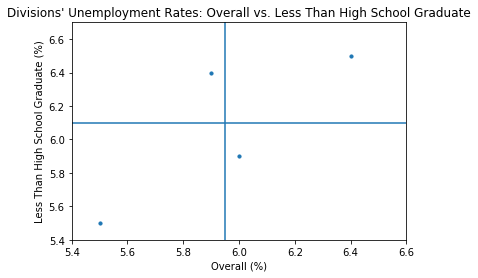

In [13]:
#Run this code to see a graph by pressing 'Shift' + 'Enter'

plt.scatter(regions["Overall (%)"],
           regions["Some College Education or Associate's Degree (%)"],s=10)

plt.xlim(5.4,6.6)
plt.ylim(5.4,6.7)
plt.axhline(y=6.1)
plt.axvline(x=5.95)
plt.title("Divisions' Unemployment Rates: Overall vs. Less Than High School Graduate")
plt.xlabel("Overall (%)")
plt.ylabel("Less Than High School Graduate (%)")

<div class="alert alert-info">  
    <strong>4.6.1</strong> In which quadrants do the points have a greater impact on the value of the correlation coefficient?
Explain
</div>

**Your answer:** Type your answer here

<div class="alert alert-info">  
    <strong>4.6.2</strong> In which quadrants will $(x_i - \bar{x})(y_i - \bar{y})$ be positive for this data set? Negative?
</div>

**Your answer:** Type your answer here

<div class="alert alert-info">  
    <strong>4.6.3</strong> How do you know that the sum of these values, represented in the formula’s numerator as $\sum_{i=1}^n[(x_i - \bar{x})(y_i - \bar{y})] $, will be positive for this data set?</div>

**Your answer:** Type your answer here



<div class="alert alert-info">  
    <strong>4.6.4</strong> Why will the denominator of the formula, or $\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2} \sqrt{\sum_{i=1}^n (y_i - \bar{y})^2} $ , always be positive?</div>

**Your answer:** Type your answer here

<div class="alert alert-info">  
    <strong>4.6.5</strong> Identify the largest and smallest possible values of r for any data set, and interpret what these values
indicate for a linear relationship between two variables.

* Largest possible $r$ value?
* Smallest possible $r$ value?

</div>

**Your answer:** Type your answer here

---

**Congratulations!** You just finished Part 2 of this lesson! Make sure to click 'File', then 'Save and Checkpoint' in the upper left-hand corner to save all the hard work you've done!




# 5. Part 3 - Create Your Own Scatter Plots <a id='5'></a> 

Now use the **unemployment** data table to make your own scatter plot. We will first select 10 states and the unemployment rates for a specific education level, and plot them against the overall unemployment rates in each location you selected. Then use your scatter plot to answer the following questions and prompts.

<div class = "alert alert-info">
    <strong>5.1</strong> The code below will randomly take 10 states from the <strong>unemployment</strong> data table to create our new data table, <strong>ten_states</strong>. </div>

In [14]:
ten_states = unemployment.sample(10)
ten_states

,State,Overall(%),Less Than High School Graduate (%),High School Graduate or Equivalent (%),Some College Eduation or Associate's Degree (%),Bachelor's Degree or Higher (%)
47,Washington,5.1,9.0,6.3,5.3,3.5
34,North Dakota,2.4,7.8,3.2,2.2,1.4
36,Oklahoma,4.5,9.2,5.5,4.4,2.0
35,Ohio,5.8,15.5,7.0,5.9,2.6
25,Missouri,5.7,14.3,7.5,5.6,2.8
4,California,7.1,10.1,9.3,7.5,4.4
10,Georgia,6.6,12.1,8.4,7.1,3.4
5,Colorado,4.3,7.5,5.4,4.7,2.9
40,South Carolina,6.5,16.2,8.3,5.9,2.7
39,Rhode Island,6.6,12.5,9.7,6.5,3.0


<div class = "alert alert-info">
    <strong>5.2</strong> Now that you have selected your 10 states you now have to pick the unemployment rates for a speficifc education level (Less Than High School Graduate (%), High School Graduate or Equivalent (%), Some College Eduation or Associate's Degree (%), or Bachelor's Degree or Higher (%)). Fill in the '...' with your chosen education level to create the <strong>my_states</strong> data table. </div>

In [53]:
my_states = ten_states[['State', 'Overall(%)', '...']]
my_states

,State,Overall(%),Less Than High School Graduate (%)
47,Washington,5.1,9.0
34,North Dakota,2.4,7.8
36,Oklahoma,4.5,9.2
35,Ohio,5.8,15.5
25,Missouri,5.7,14.3
4,California,7.1,10.1
10,Georgia,6.6,12.1
5,Colorado,4.3,7.5
40,South Carolina,6.5,16.2
39,Rhode Island,6.6,12.5


<div class = "alert alert-info">
<strong>5.2.1</strong> Given that you have created your own <strong>my_states</strong> data table we will now create a scatter plot. Run the cell below to plot your scatter plot. Remember you're plotting the overall unemployment rate against your chosen unemployment rate for a specific education level. </div>

In [54]:
from censusnotebooks.visualization import matplotlib_seaborn

plotter = matplotlib_seaborn.Plot(my_states)
plotter.new_plot()

Here are the types of plots you may use: 

(1) histogram 

(2) barplot 

(3) scatterplot 

(4) lineplot 

Enter the number associated to the type of plot you would like to use: 
3
Plotting a scatterplot.
Here are the columns of your table:
(1) State 

(2) Overall(%) 

(3) Less Than High School Graduate (%) 



KeyboardInterrupt: 

<div class = "alert alert-info">
    <strong>5.2.2</strong> Does there appear to be a relationship between unemployment rates for this educational attainment
level and the overall rates for these locations? If so, describe the relationship as linear or not linear, as
strong or weak, and as positive or negative.</div>


**Your answer:** Type your answer here

<div class = "alert alert-info">
    <strong>5.3</strong> Determine the correlation coefficient using the <strong>Calculations Table for Correlation Coefficients</strong> below. Revisit section <strong>4.2 Correlation Coefficients</strong> if you need a quick reminder about making the following calculations.

<em>Note:</em> $x_i$ are your values for the 'Overall' unemployement rate and $y_i$ are your values for the unemployment rate for the specific education level that you picked above. </div>

| $x_i$| $y_i$|$x_i - \bar{x}$|$y_i-\bar{y}$|$(x_i-\bar{x})(y_i - \bar{y})$|$(x_i-\bar{x})^2$|$(y_i-\bar{y})^2$|
|------|------|---------------|-------------|------------------------------|-----------------|-----------------|
|  ??? | ???  |  ?????????    |  ?????????  | ?????????                    | ?????????       | ?????????       |
|  ??? | ???  | ?????????     |  ?????????  | ?????????                    | ?????????       | ?????????       |
|  ??? | ???  | ?????????     |  ?????????  | ?????????                    | ?????????       | ?????????       |
|  ??? | ???  | ?????????     |  ?????????  | ?????????                    | ?????????       | ?????????       |
|  ??? | ???  | ?????????     |  ?????????  | ?????????                    | ?????????       | ?????????       |
|  ??? | ???  | ?????????     |  ?????????  | ?????????                    | ?????????       | ?????????       |
|  ??? | ???  | ?????????     |  ?????????  | ?????????                    | ?????????       | ?????????       |
|  ??? | ???  | ?????????     |  ?????????  | ?????????                    | ?????????       | ?????????       |
|  ??? | ???  | ?????????     |  ?????????  | ?????????                    | ?????????       | ?????????       |
|  ??? | ???  | ?????????     |  ?????????  | ?????????                    | ?????????       | ?????????       |



Using the cells below follow section 3.2. Feel free to add as many cells as you need to complete all your calculations.

In [166]:
#round('...',2)

In [ ]:
#round('...',2)

In [ ]:
#round('...',4)

In [165]:
#round('...',4)

Now that you have filled out the above table we can calculate the remaining:

$$A = \sum_{i=1}^n[(x_i - \bar{x})(y_i - \bar{y})]$$
$$ B = \sqrt{\sum_{i=1}^n (x_i - \bar{x})^2} $$
$$ C = \sqrt{\sum_{i=1}^n (y_i - \bar{y})^2} $$

<div class = "alert alert-info"><strong>5.3.2</strong> Calculate A</div>

In [183]:
#Run this code by pressing 'Shift' + 'Enter'

A = np.sum(...)
A

<div class = "alert alert-info"><strong>5.3.3</strong> Calculate B</div>

In [ ]:
#Run this code by pressing 'Shift' + 'Enter'

B = np.sqrt(np.sum(...))
B

<div class = "alert alert-info"><strong>5.3.4</strong> Calculate C</div>

In [ ]:
#Run this code by pressing 'Shift' + 'Enter'

C = np.sqrt(np.sum(...))
C

<div class = "alert alert-info">
<strong>5.4</strong>  With these value now identified, the formula for correlation coefficients can be simplified to:

$$ r = \frac{A}{B \cdot C}$$


Using the values for A, B, and C let's find the value of $r$.</div>


In [181]:
#Run this code by pressing 'Shift' + 'Enter'

r = A/(B*C)
r

<div class="alert alert-info">  

<strong>5.4.1</strong> How does the value of the correlation coefficient, r, confirm or refute your interpretation in
question 4.2.1?</div>

**Your answer:** Type your answer here

<div class="alert alert-info"> 
    <strong>5.4.2</strong> Does there appear to be a relationship between the unemployment rates for people with a bachelor’s
degree or higher and overall unemployment rates? If so, describe this relationship as linear or not
linear, as strong or weak, and as positive or negative. </div>

**Your answer:** Type your answer here

<div class="alert alert-info"> 
    <strong>5.2.3</strong> Based on what you have learned, would you agree or disagree that achieving higher levels of education
makes you more employable? Explain, using specific data and what you have learned from this lesson.
     </div>

**Your answer:** Type your answer here

---

**Congratulations!** You just finished Part 3 of this lesson! Make sure to click 'File', then 'Save and Checkpoint' in the upper left-hand corner to save all the hard work you've done!


# 6. Part 4 - Draw Conclusions and Review Key Concepts  <a id='6'></a> 

<div class="alert alert-info"> 
    <strong>6.1</strong> What conclusions can you draw from your and your classmates’ investigations? Consider how the
percentage of unemployed people at a given education level relates to the overall unemployment rate for a
set of states, regions, or divisions. </div>



**Your answer:** Type your answer here

<div class="alert alert-info"> 
    <strong>6.2</strong> Think back to the predictions you made before the activity. How accurate were they? Explain. </div>


**Your answer:** Type your answer here

<div class="alert alert-info"> 
<strong>6.3</strong> What is a correlation coefficient, and what can it tell you about the relationship between two variables?
</div>

**Your answer:** Type your answer here

<div class="alert alert-info"> 
    <strong>6.4</strong> Explain how to determine whether a data point on a scatter plot is influential. </div>

**Your answer:** Type your answer here

---

**Congratulations!** You just finished this lesson! Make sure to click 'File', then 'Save and Checkpoint' in the upper left-hand corner to save all the hard work you've done!


Now you know how to analyze state and regional unemployment data by creating scatter plots and calculating correlation coefficients.

You can now: 
1. understand state and regional unemployment data.
2. plot scatter plots and calculate correlation coefficients
3. assess the strength of a linear relationship using correlation coefficients. 

---
## 7. Bibliography <a id='7'></a> 

**Notebook developed by:** Jarelly Martin

**Date:** Nov 25, 2019

**Using:** https://www.census.gov/programs-surveys/sis/activities/math/applying-correlation-coefficients.html 

**Suggested Grade Level:** 9-12

**Data Science Discovery Program:** http://data.berkeley.edu/education/module